 https://docs.opencv.org/master/d1/d5c/tutorial_py_kmeans_opencv.html  
   
 cv.kmeans() function in OpenCV for data clustering  

# 1. Data with Only One Feature

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
x = np.random.randint(25, 100, 25) #from , to , 갯수
y = np.random.randint(175, 255, 25)
z = np.hstack((x, y))
print(z)

[ 84  73  27  39  95  46  40  84  53  99  43  75  70  98  88  72  33  82
  53  32  29  64  98  56  74 223 213 224 240 188 254 182 217 227 236 175
 183 225 243 186 189 232 183 219 233 229 251 225 198 231]


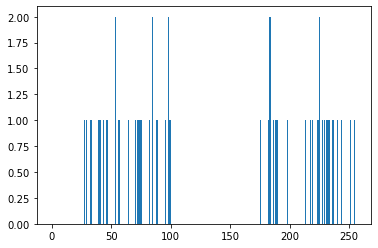

((array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
         0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 2., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 2.,
         0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 2., 1., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 2., 0., 0., 1.,
         0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,

In [5]:
z = z.reshape((50, 1)) #50 개의 열벡터로 바뀐다.
z = np.float32(z)
plt.hist(z, 256, [0, 256]) , plt.show()

In [6]:
# Define criteria = ( type, max_iter = 10, epsilon = 1.0)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# set flags (just avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

#Apply KMEANs
compactness, labels, centers = cv2.kmeans(z, 2, None, criteria, 10, flags)

In [7]:
A = z[labels == 0]
B = z[labels == 1]

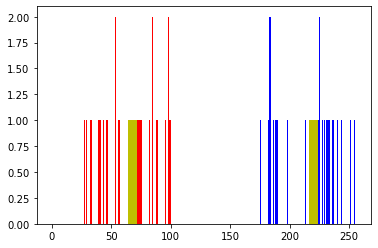

In [8]:
#plot A를 빨강으로 plot B를 파랑으로 센트로이드는 노랑으로
plt.hist(A, 256, [0,256], color = 'r')
plt.hist(B, 256, [0,256], color = 'b')
plt.hist(centers, 32, [0,256], color = 'y')
plt.show()

# 2. Data with Multiple Features

In [21]:
X = np.random.randint(25, 50, (25, 2)) # 25에서 50 사이로, 25행 2열의 배열을 만든다.
Y = np.random.randint(60, 85, (25, 2))
Z = np.vstack((X, Y))
Z = np.float32(Z)

In [22]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, label, center = cv2.kmeans(Z, 2, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [23]:
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]

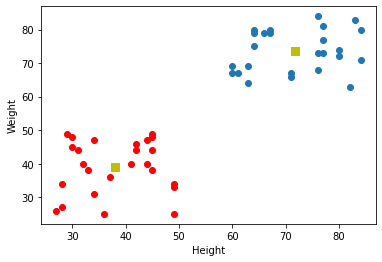

In [24]:
plt.scatter(A[:, 0], A[:, 1])
plt.scatter(B[:, 0], B[:, 1], c = 'r')
plt.scatter(center[:, 0], center[:,1],s=80, c='y',marker='s')
plt.xlabel('Height'), plt.ylabel('Weight')
plt.show()

# 3. Color Quantization

Color Quantization is the process of reducing number of colors in an image.  
### One reason to do so is to reduce the memory.   
Sometimes, some devices may have limitation such that it can produce only limited number of colors.  
In those cases also, color quantization is performed.  
Here we use k-means clustering for color quantization.  
  
There is nothing new to be explained here.  
There are 3 features, say, R,G,B.   

So we need to reshape the image to an array of Mx3 size (M is number of pixels in image).  
And after the clustering, we apply centroid values (it is also R,G,B) to all pixels, such that resulting image will have specified number of colors.   
And again we need to reshape it back to the shape of original image. Below is the code:

In [29]:
img = cv2.imread('home.jpg')
Z = img.reshape((-1, 3)) #cv2에서 읽어들이는 것은, ndarray이다.
print("Z",Z)

Z [[162  93  36]
 [162  93  36]
 [163  94  37]
 ...
 [114 176 194]
 [114 176 194]
 [114 176 194]]


https://rfriend.tistory.com/345  
  
reshape에서 -1의 의미  

In [32]:
print(type(img))

<class 'numpy.ndarray'>


In [30]:
Z = np.float32(Z)

In [31]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 8
ret, label, center = cv2.kmeans(Z, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
center = np.uint8(center)
